In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [51]:
# data = yf.download(['AMD', 'WMT', 'NVDA', 'SWBI', 'MSFT', 'AAPL'], start='2020-01-01', end='2020-06-01')
data = yf.download(['AMD', 'NVDA', 'MSFT'], start='2020-01-01', end='2020-06-01')

[*********************100%%**********************]  3 of 3 completed


In [52]:
close = data.Close
close

,AMD,MSFT,NVDA
Date,,,
2020-01-02,49.099998,160.619995,59.977501
2020-01-03,48.599998,158.619995,59.017502
2020-01-06,48.389999,159.029999,59.264999
2020-01-07,48.250000,157.580002,59.982498
2020-01-08,47.830002,160.089996,60.095001
...,...,...,...
2020-05-22,55.169998,183.509995,90.262497
2020-05-26,53.189999,181.570007,87.177498
2020-05-27,52.740002,181.809998,85.252502


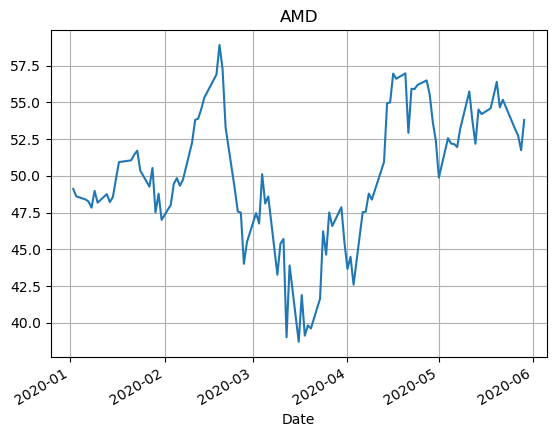

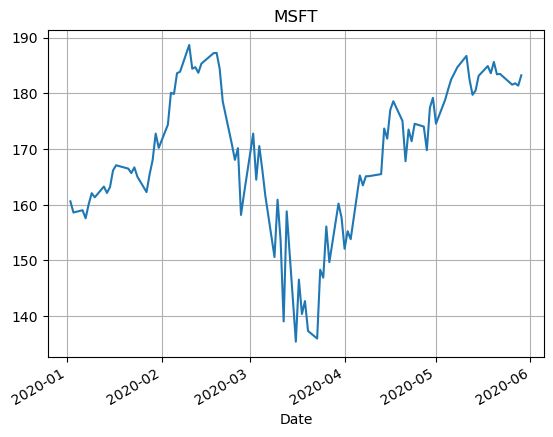

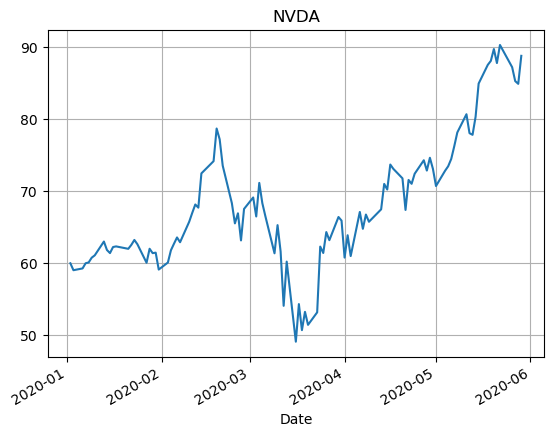

In [53]:
for name in close.columns:
    close[name].plot()
    plt.grid()
    plt.title(name)
    plt.show()

In [54]:
profit = close.pct_change()
profitMean = profit.mean()
profitMean

AMD     0.001894
MSFT    0.001969
NVDA    0.004991
dtype: float64

In [66]:
cov = profit.cov().to_numpy()
cov

array([[0.00199638, 0.00135059, 0.00186873],
       [0.00135059, 0.00136231, 0.0015522 ],
       [0.00186873, 0.0015522 , 0.00228562]])

In [67]:
cnt = len(profit.columns)

def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum()
    return res

r = randPortf()
print(r)
print(r.sum())

[0.74768059 0.05654989 0.19576952]
0.9999999999999999


In [68]:
def profitPortf(r):
    return np.matmul(profitMean.values, r)

r = randPortf()
print(r)
d = profitPortf(r)  # returns
print(d)

[0.16842258 0.63243567 0.19914175]
0.002558154457239857


In [69]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r, cov), r))

r = randPortf()    
print(r)
rs = riskPortf(r)  # risks
print(rs)

[0.05029606 0.79938202 0.15032192]
0.03790946394436964
